In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
from pmdarima import auto_arima

# SARIMAX predictions

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

from pmdarima.arima import auto_arima

def sarimax_predictions(asset, start_date, end_date):
    data = yf.download(asset, start=start_date, end=end_date)
    print("Downloaded data shape:", data.shape)  # Add this line
    if data.empty:
        print("Data for the specified date range is empty.")
        return None
    data['Closee'] = (data['High']+data['Low']+data['Close'])/3
    data['RSI'] = ta.rsi(data.Close, length=15)  # RSI (relative strength index)
    data['EMAF'] = ta.ema(data.Close, length=20)  # fast moving avg
    data['EMAM'] = ta.ema(data.Close, length=100)  # medium moving avg
    data['EMAS'] = ta.ema(data.Close, length=150)  # slow moving avg
    data['vwap'] = (data.Volume * data.Closee).cumsum() / data.Volume.cumsum()
    data['target'] = data['Close'].shift(-1)  # C(t) = C(t-1) + diff(t)
    data.dropna(inplace=True)
    data.reset_index(inplace=True)
    data = data.drop(['Volume', 'Close', 'Date', 'Adj Close','Closee'], axis=1)
    
    # check for enough samples
    if len(data) < 62:  
        print("need more data")
        return None
    
    # SARIMAX
    X_SARIMAX = data.drop(['target'], axis=1)
    y_SARIMAX = data['target']
    train_y = y_SARIMAX.iloc[:-31]
    test_y = y_SARIMAX.iloc[-31:]
    train_X = X_SARIMAX.iloc[:-31]
    test_X = X_SARIMAX.iloc[-31:]
    
    model_SARIMAX = auto_arima(y=train_y, X=train_X, seasonal=True, m=7)
    predictions_SARIMAX = pd.Series(model_SARIMAX.predict(n_periods=31, X=test_X))
    
    predictions_SARIMAX.index = test_y.index
    df_cp = pd.DataFrame(predictions_SARIMAX, columns=[asset])
    
    return df_cp



In [3]:
#sarimax_predictions('BTC-USD', '2023-03-31','2024-03-31')

In [4]:
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
#cryptocurrencies = ['BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']
def extractor(alg, start_date, end_date):
    results = []
    for crypto in cryptocurrencies:
        result = alg(crypto, start_date, end_date)
        results.append(result)
    df_crypto = pd.concat(results, axis=1) 
    return df_crypto

#extractor(sarimax_predictions, '2023-03-31', '2024-03-31')


In [6]:
dfn= extractor(sarimax_predictions, '2023-01-31', '2024-02-29');print(dfn)
#'2023-01-31', '2024-02-29'#feb
#'2023-03-31', '2024-03-31'#march
#'2023-03-31', '2024-04-30' #aprl

[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\

Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (394, 6)
        BNB-USD       BTC-USD      ETH-USD   XRP-USD     SOL-USD   AVAX-USD  \
213  306.710680  41950.320605  2291.024674  0.526768   94.587807  36.182426   
214  308.999308  41775.408993  2313.340950  0.532664   96.151368  35.176242   
215  312.719552  42728.963554  2329.573426  0.518770  102.969876  35.754261   
216  310.425694  42505.103272  2316.907759  0.502977  103.779746  34.254238   
217  304.819983  42358.422467  2265.902012  0.501093  101.981541  32.911441   
218  304.209415  42741.712903  2271.013460  0.508207  102.611674  35.376866   
219  304.856257  42840.353227  2273.207367  0.519404  104.840364  36.233275   
220  305.824954  42766.022973  2253.938087  0.509295  102.254349  35.304466   
221  308.664643  42435.955565  2249.520275  0.508344   99.934662  34.666208   
222  305.578882  42566.929070  2280.110872  0.506686  100.082263  33.748245   
223  308.963104  43073.730279  2334.131075  0.511877  102.875556  34.367236   
224  314.855026  440

# Dataframe with Parameters

In [8]:
from pypfopt.expected_returns import mean_historical_return
Mu = mean_historical_return(dfn)/12
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(dfn).ledoit_wolf()

In [9]:
#print(Mu)
#print(S**0.5)


In [11]:
df = pd.DataFrame(S**0.5, index=cryptocurrencies)
diagonals = np.diag(df.values)
df1 = pd.DataFrame(diagonals, index=cryptocurrencies, columns=['STD_Dev'])
df1['returns'] = pd.DataFrame(Mu,columns=['returns'])
df1['SR']=((df1['returns']-0.00583)/df1['STD_Dev'])
df1=df1.reset_index();df1


,index,STD_Dev,returns,SR
0,BNB-USD,0.256347,0.623063,2.407799
1,BTC-USD,0.238125,0.657592,2.737057
2,ETH-USD,0.229093,0.876755,3.801626
3,XRP-USD,0.334907,0.123480,0.351292
4,SOL-USD,0.375470,0.668606,1.765191
5,AVAX-USD,0.455823,0.067559,0.135424
6,USDT-USD,0.140243,0.000131,-0.040634
7,USDC-USD,0.140222,-0.000159,-0.042708
8,SHIB-USD,0.391810,0.224512,0.558134
9,DOGE-USD,0.317327,0.264350,0.814680


# Recommender

In [12]:
#using min-max scaler scale the data
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_ni = df1.drop('index',axis =1);df_ni

dfs = pd.DataFrame(scaler.fit_transform(df_ni), columns=df_ni.columns);#dfs


In [13]:
dist = pdist(dfs, metric='euclidean')

#simalirity kxk matrix
simmax = squareform(dist)


#print("Standardized DataFrame:")
#print(dfs)
#print("\nsimilarity Matrix (based on Euclidean distance):")
#print(simmax)
print(simmax.shape)

(10, 10)


In [14]:
df1 = df1.rename(columns={'index':'product'})
product_name = df1['product']
product_name.shape
indices = pd.Series(df1.index, index=df1['product'])

In [15]:
def recommend(product):
    idx = indices[product]
    sim_scores = list(enumerate(simmax[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    return product_name.iloc[product_indices]

In [16]:
df1

,product,STD_Dev,returns,SR
0,BNB-USD,0.256347,0.623063,2.407799
1,BTC-USD,0.238125,0.657592,2.737057
2,ETH-USD,0.229093,0.876755,3.801626
3,XRP-USD,0.334907,0.123480,0.351292
4,SOL-USD,0.375470,0.668606,1.765191
5,AVAX-USD,0.455823,0.067559,0.135424
6,USDT-USD,0.140243,0.000131,-0.040634
7,USDC-USD,0.140222,-0.000159,-0.042708
8,SHIB-USD,0.391810,0.224512,0.558134
9,DOGE-USD,0.317327,0.264350,0.814680


In [17]:
max_sr_index = df1['SR'].idxmax()  
product_value = df1.loc[max_sr_index, 'product']  
print(product_value)

ETH-USD


In [18]:
recommend('ETH-USD').head(6)

1     BTC-USD
0     BNB-USD
4     SOL-USD
9    DOGE-USD
8    SHIB-USD
3     XRP-USD
Name: product, dtype: object

# Scalper and trend and plots

# a) Actuals

def scalp(asset,start_date,end_date):
    df=yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close, length=14) 
    
    #declare signals
    df['action'] = 'hold'  
    sell_constraint = (df['Close'] > df['VWAP']) & (df['RSI'] > 70)#57
    buy_constraint = (df['Close'] < df['VWAP']) & (df['RSI'] < 30)#48
    df.loc[sell_constraint, 'action'] = 'sell'
    df.loc[buy_constraint, 'action'] = 'buy'
    
    initial_wealth=100000
    df['payoff'] = 0 #start payoff =0
    df.loc[df['action'] == 'buy', 'payoff'] = -df['Close'] #buy the asset(-close)
    df.loc[df['action'] == 'sell', 'payoff'] = df['Close'] #sell the asset(+close/ short is allowed)
    
    #find cummulative payoff
    df['cumulative_payoff'] = df['payoff'].cumsum()
    wealth =100000 #but yoy can say initial wealth is $100,000
    df['returns'] = (wealth + df['cumulative_payoff']) / initial_wealth
 
    #return #df['returns'].mean() df[]
    return df['returns'].iloc[-1],asset
    


    
    
    

In [31]:
#this trend is for actual data.
def trend(asset,start_date,end_date):
    df = yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close,length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    
    up = (df['Close'] > df['9_ema'])
    down = (df['Close'] < df['9_ema']) 
    df.loc[up, 'trend'] = 1
    df.loc[down, 'trend'] = 0
    direction= df.trend.sum()
    dirr=[]
    if direction>=11:
        dirr.append('upward trend')
    else:
        dirr.append('downward trend')
    return dirr,asset,direction

In [32]:
import matplotlib.pyplot as plt
def plots(asset,start_date,end_date):
    df = yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close,length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    return plt.title(asset),df.Close.plot(color='red',grid = True, figsize=(10,8),legend=True),df.VWAP.plot(figsize=(10,8),grid = True,legend=True),df['9_ema'].plot(color='green',grid = True, figsize=(10,8),legend=True)

def plotss(asset):
    df['9_ema']=ta.ema(dfn.asset,lenght=9)
    return plt.title(asset),dfn.asset.plot(color='red',grid = True, figsize=(10,8),legend=True),df['9_ema'].plot(color='green',grid = True, figsize=(10,8),legend=True)


In [33]:
#this trend is for actual data.
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
#cryptocurrencies = ['BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']
for j in cryptocurrencies:
    m = trend(j, '2024-02-01', '2024-02-29')
    print(m)
    
#[ 'BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(['upward trend'], 'BNB-USD', 19.0)
(['upward trend'], 'BTC-USD', 18.0)
(['upward trend'], 'ETH-USD', 19.0)
(['upward trend'], 'XRP-USD', 15.0)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(['upward trend'], 'SOL-USD', 13.0)
(['upward trend'], 'AVAX-USD', 12.0)
(['upward trend'], 'USDT-USD', 11.0)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(['downward trend'], 'USDC-USD', 7.0)
(['upward trend'], 'SHIB-USD', 16.0)
(['upward trend'], 'DOGE-USD', 16.0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


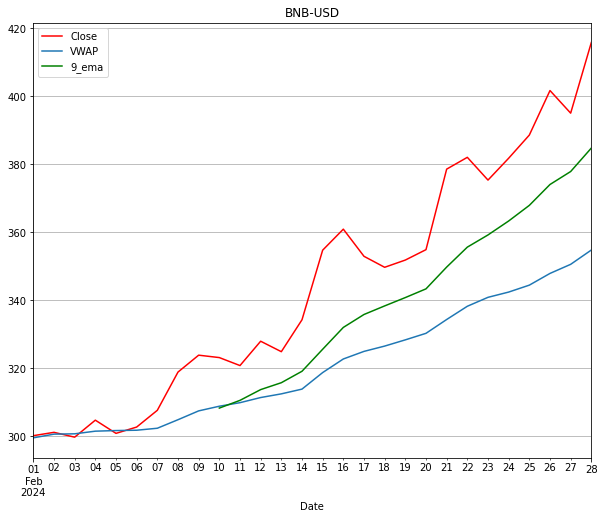

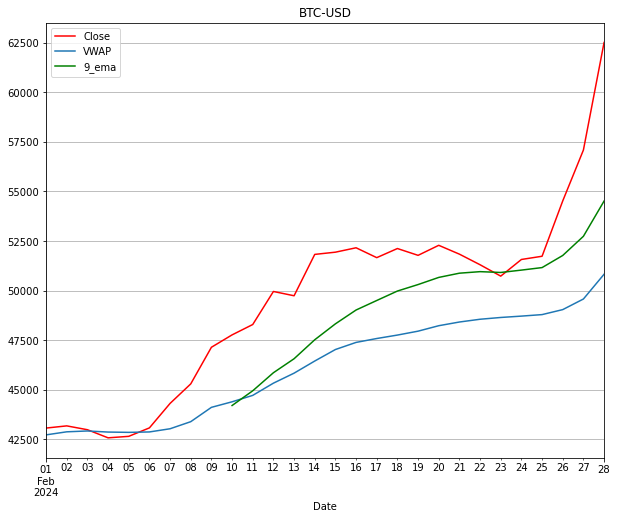

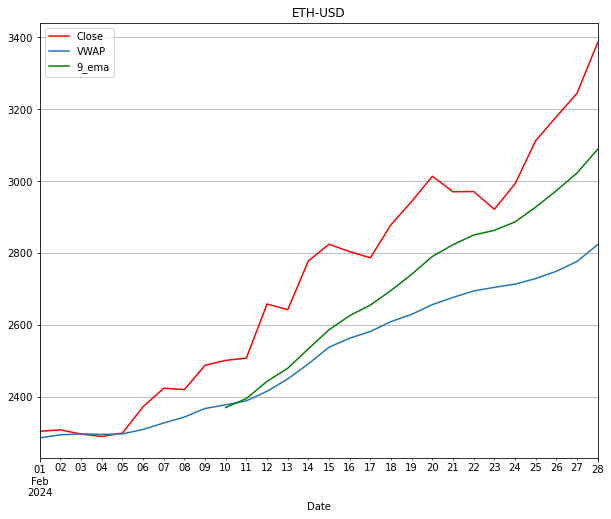

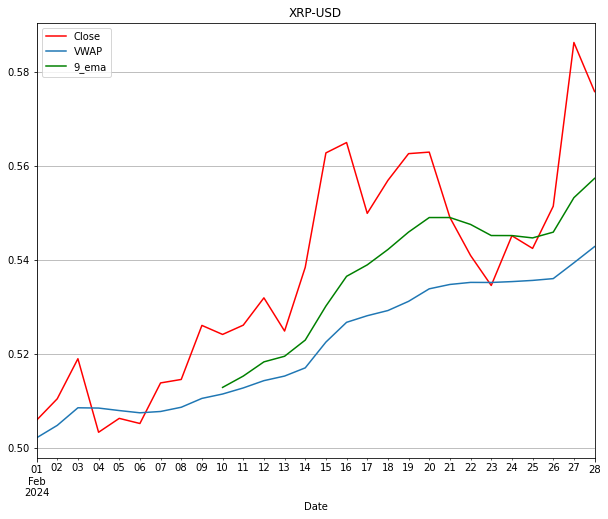

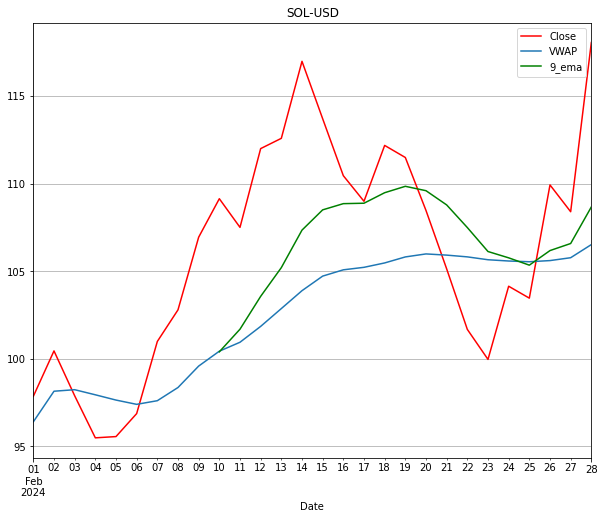

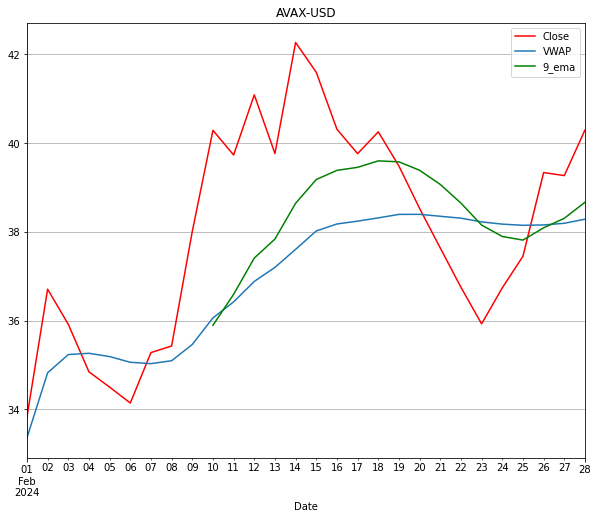

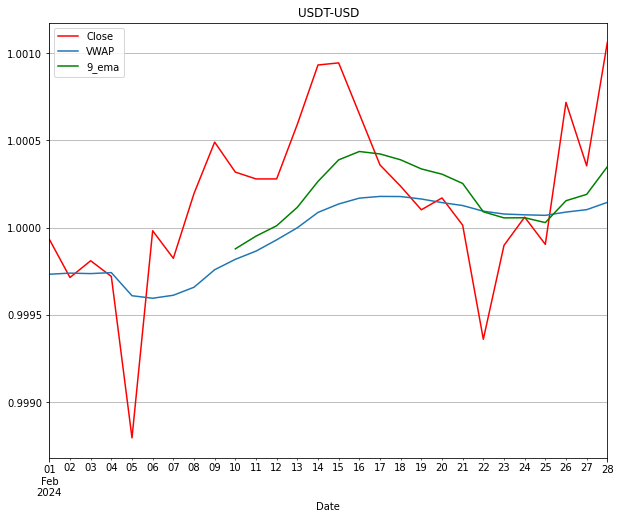

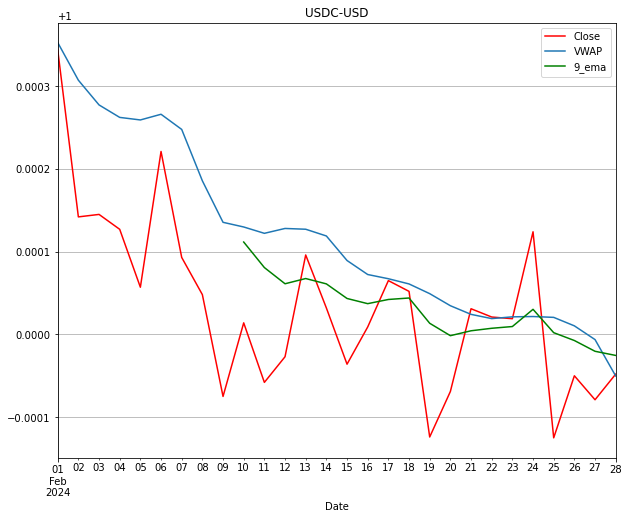

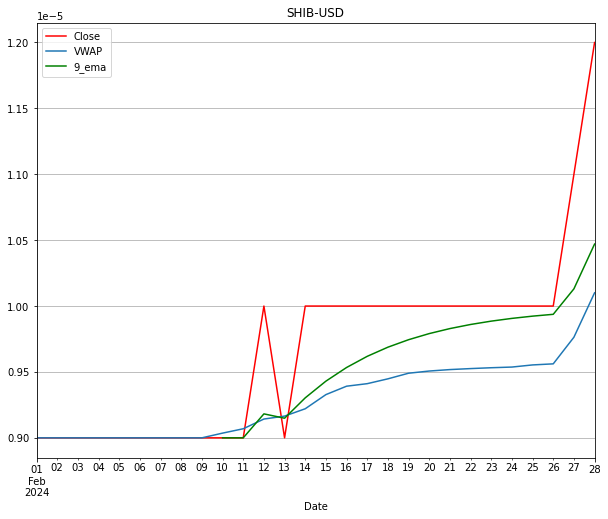

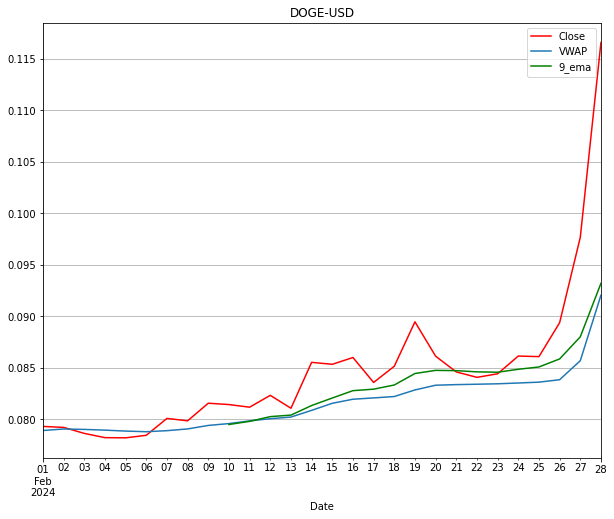

In [34]:
#actual trend plots
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
for i in cryptocurrencies:
    plt.figure(figsize=(13, 10))
    r = plots(i, '2024-02-01', '2024-02-29')

# b) Predictions

In [35]:
#this trend is predicted

for k in dfn.columns[:-1]:
    up=(dfn[k]>ta.ema(dfn[k],length=9))
    down=(dfn[k]<ta.ema(dfn[k],length=9))
    dfn.loc[up,'trend']=1
    dfn.loc[down,'trend']=0
    directionn= dfn.trend.sum()
    dirn=[]
    if directionn>=11:
        dirn.append('upward trend')
    else:
        dirn.append('downward trend')
    print( dirn,k,directionn)

['upward trend'] BNB-USD 22.0
['upward trend'] BTC-USD 22.0
['upward trend'] ETH-USD 21.0
['upward trend'] XRP-USD 15.0
['upward trend'] SOL-USD 17.0
['upward trend'] AVAX-USD 12.0
['upward trend'] USDT-USD 11.0
['downward trend'] USDC-USD 6.0
['upward trend'] SHIB-USD 13.0
['upward trend'] DOGE-USD 18.0


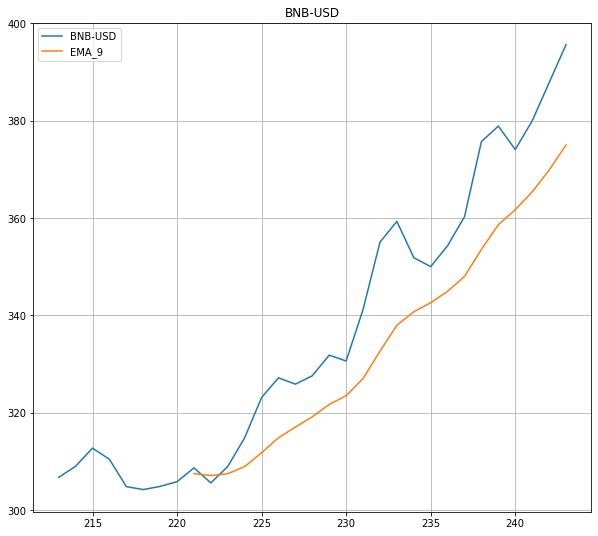

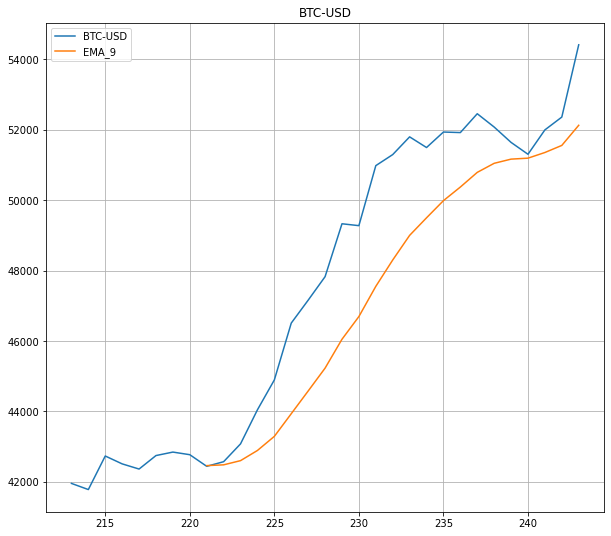

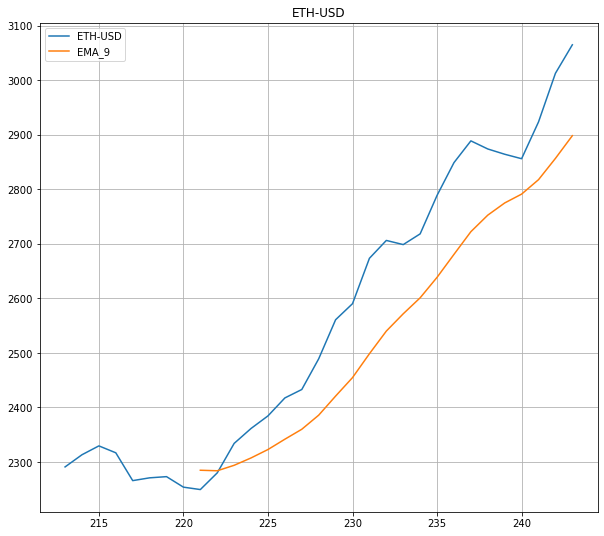

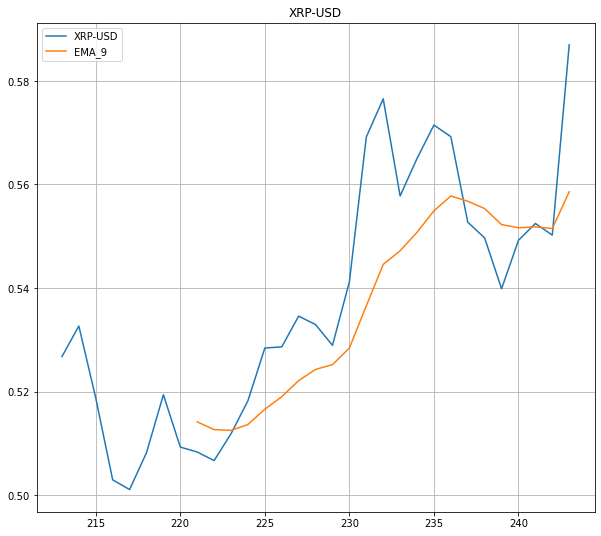

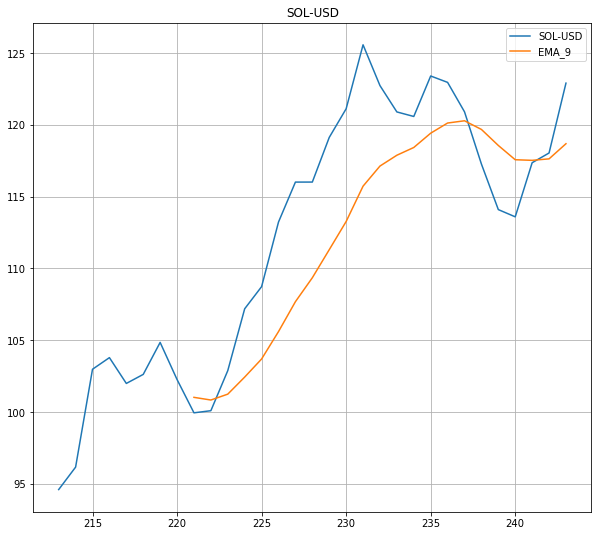

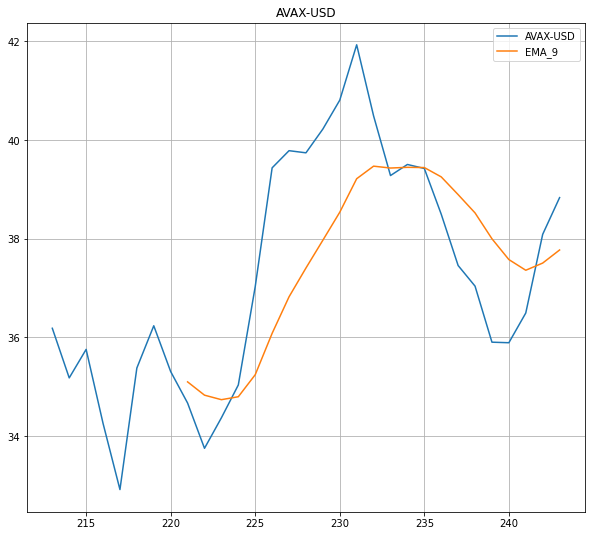

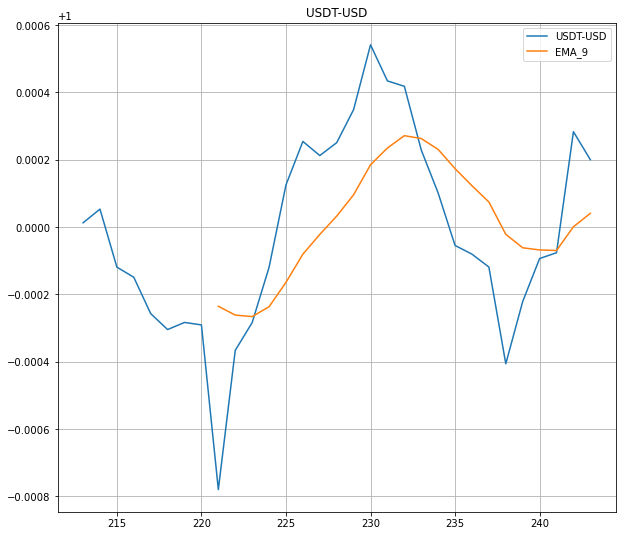

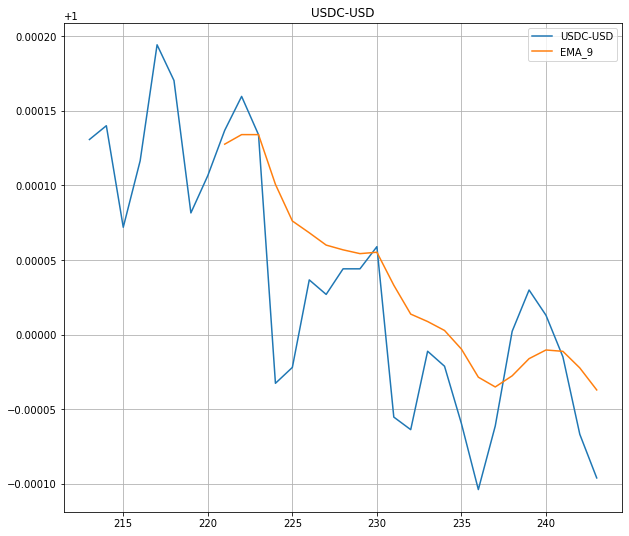

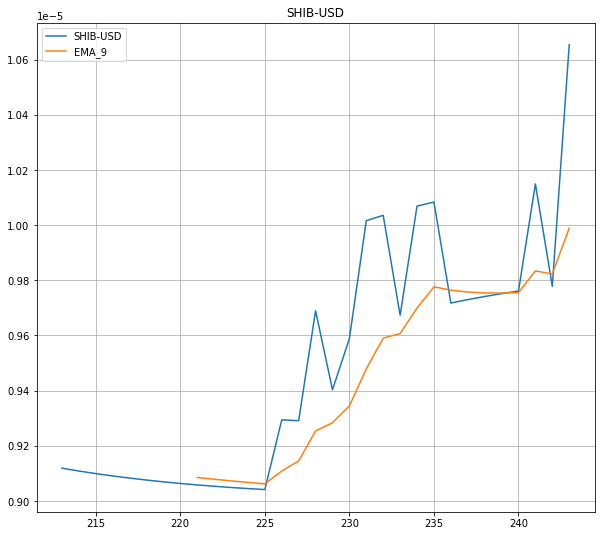

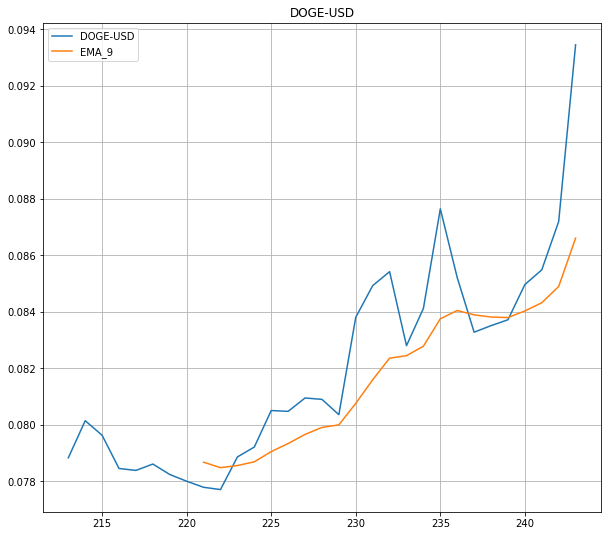

In [36]:
#plots for the predictions
for k in dfn.columns[:-1]:
    plt.figure(figsize=(10, 9))
    plt.title(k)
    dfn[k].plot(grid=True,legend=True)
    ema =ta.ema(dfn[k],length=9);ema.plot(grid=True,legend=True)
    plt.show()

# Back Test with Scalper

In [37]:
def scalp(asset,start_date,end_date):
    df=yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close, length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    
    
    #declare signals
    df['action'] = 'hold'  
    sell_constraint = (df['Close'] > df['VWAP']) & (df['RSI'] > 70)#57
    buy_constraint = (df['Close'] < df['VWAP']) & (df['RSI'] < 30)#48
    df.loc[sell_constraint, 'action'] = 'sell'
    df.loc[buy_constraint, 'action'] = 'buy'
    
    #detect trend
    up = (df['Close'] > df['9_ema'])
    down = (df['Close'] < df['9_ema']) 
    df.loc[up, 'trend'] = 1
    df.loc[down, 'trend'] = 0
    direction= df.trend.sum()
    trendd=[]
    if direction>=11:
        trendd.append('upward_trend')
    else:
        trendd.append('downward_trend')
        
        
    #rules
    initial_wealth = 100000
    for trend in trendd:
        if trend=='upward_trend':
            initial_asset_units = round(initial_wealth/df['Close'].iloc[0])
            initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units
        elif trend=='downward_trend':
            #initial_asset_units= 1
            initial_asset_units=  -round(initial_wealth/df['Close'].iloc[0])#interchange for short 
            initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units

    exp_price = round(df.median())
    df['payoff'] = 0
    df['position'] = 0
    wealth = initial_wealth
    asset_units = initial_asset_units
    
    for index, row in df.iterrows():
        if row['action'] == 'buy' and row['Close'] <= exp_price.iloc[0] and row['Close'] <= wealth:
            df.at[index, 'payoff'] = -row['Close']  # pay for the asset
            df.at[index, 'position'] = 1  # asset held
            wealth =wealth- row['Close']  # reduce wealth
            asset_units = asset_units+1  # increase asset units
            
        elif row['action'] == 'sell' and asset_units > 0 and row['Close'] >= exp_price.iloc[0]: 
            df.at[index, 'payoff'] = row['Close']  # gain money from sale
            df.at[index, 'position'] = 0  # position is 0
            wealth = wealth+row['Close'] #increase wealth
            asset_units = asset_units-1 #reduce assets
    ret = ((wealth+asset_units*df['Close'].iloc[-1])/100000 -1)*100; print('returns from the trade is:',round(ret),'%')
    return ret,'%',asset
    

In [38]:
#df_results=pd.DataFrame()
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
for crypto in cryptocurrencies:
   
    result = ((scalp(crypto,'2024-02-01', '2024-02-29')))
    print(result) #in percentage btw
  

[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is 

returns from the trade is: 38 %
(37.91599877929688, '%', 'BNB-USD')
returns from the trade is: 18 %
(17.947210937500003, '%', 'BTC-USD')
returns from the trade is: 41 %
(41.149089843750005, '%', 'ETH-USD')



C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select o

returns from the trade is: 14 %
(13.828393363952628, '%', 'XRP-USD')
returns from the trade is: 21 %
(20.64567369842529, '%', 'SOL-USD')
returns from the trade is: 19 %
(19.115528999328625, '%', 'AVAX-USD')



C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select o

returns from the trade is: 0 %
(0.11280372548103657, '%', 'USDT-USD')
returns from the trade is: 0 %
(0.03918864619731899, '%', 'USDC-USD')
returns from the trade is: 33 %
(33.33333333202848, '%', 'SHIB-USD')
returns from the trade is: 47 %
(46.96372717513144, '%', 'DOGE-USD')



C:\Users\ashok\AppData\Local\Temp/ipykernel_7188/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())


In [39]:
recommend('DOGE-USD').head(6)

3     XRP-USD
8    SHIB-USD
5    AVAX-USD
4     SOL-USD
0     BNB-USD
6    USDT-USD
Name: product, dtype: object

In [40]:
recommend('BNB-USD').head(6)

1     BTC-USD
4     SOL-USD
2     ETH-USD
9    DOGE-USD
8    SHIB-USD
3     XRP-USD
Name: product, dtype: object

In [169]:
df1

,product,STD_Dev,returns,SR
0,BNB-USD,0.349000,0.074017,0.011511
1,BTC-USD,0.351058,-0.034389,-0.297355
2,ETH-USD,0.442365,-0.018415,-0.199870
3,XRP-USD,0.337565,-0.065574,-0.401624
4,SOL-USD,0.410115,-0.074979,-0.353509
5,AVAX-USD,0.531431,-0.080769,-0.283703
6,USDT-USD,0.196917,-0.000168,-0.356334
7,USDC-USD,0.196899,0.000076,-0.355126
8,SHIB-USD,0.678007,-0.063987,-0.197618
9,DOGE-USD,0.774941,-0.077474,-0.190303


# End

In [38]:
#The 9 EMA strategy generates buy signals when the price moves above the 9 EMA line and sell signals 
#when the price moves below the indicator